In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_mrr_results(file):
    # Step 1: Read content from file
    with open(file, 'r') as f:
        data = f.read()

    # Step 2: Parse the content
    lines = [line.strip() for line in data.splitlines() if line.strip()]
    bins = []
    num_docs = []
    mrr = []
    lengths = []

    for line in lines:
        if 'Bin' in line:
            bins.append(line.split('(')[0].strip())
            # Extracting length value and appending it to lengths list
            length_val = line.split('(')[1].split(')')[0].strip()
            lengths.append(length_val)
        elif 'Number of docs' in line:
            num_docs.append(int(line.split(':')[1].strip()))
        elif 'MRR@10' in line:
            mrr.append(float(line.split('=')[1].strip()))

    df = pd.DataFrame({
        'Bin': bins,
        'Length': lengths,
        'Number of docs': num_docs,
        'MRR@10': mrr
    })

    n_docs = sum(df['Number of docs'])

    weighted_mrr = sum(df['MRR@10'] * df['Number of docs'])/n_docs

    print(f'MRR@10: {weighted_mrr}')

    # Step 3: Plotting
    fig, ax1 = plt.subplots(figsize=(12, 7))

    ax2 = ax1.twinx()
    df.plot(x='Bin', y='Number of docs', kind='bar', ax=ax1, position=1, color='blue', legend=False)
    df.plot(x='Bin', y='MRR@10', marker='o', ax=ax2, color='red', legend=False)

    ax1.set_ylabel('Number of docs', color='blue')
    ax2.set_ylabel('MRR@10', color='red')
    ax1.set_xlabel('Bin')
    ax1.set_title('Number of docs and MRR@10 vs Bin')
    plt.show()

### MSMARCO_PASSAGE

MRR@10: 0.39500909628416664


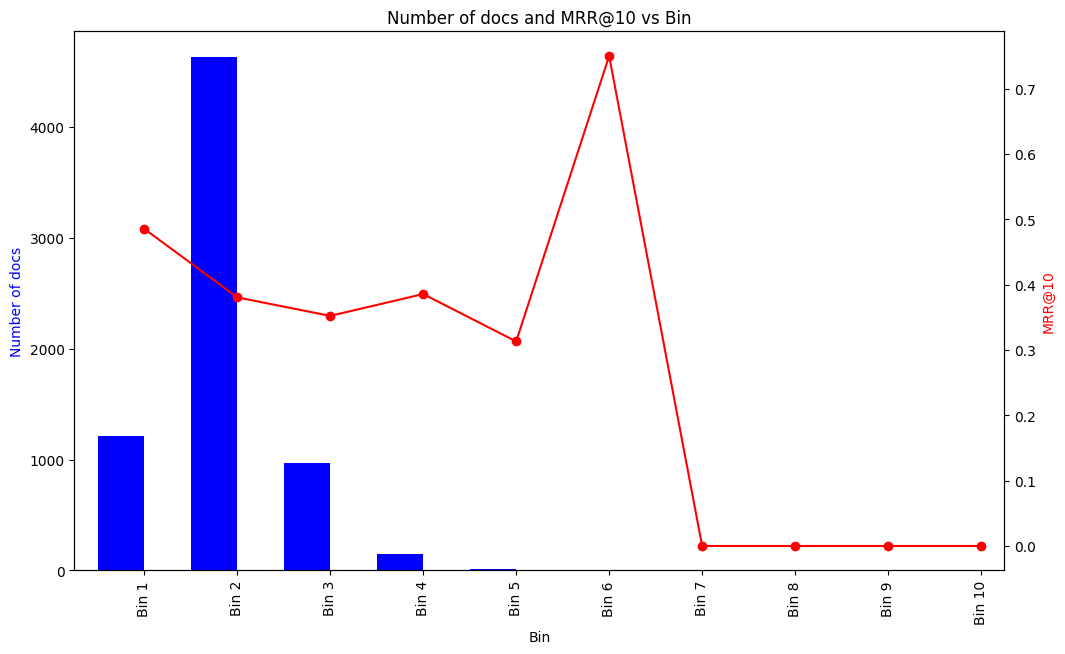

In [3]:
plot_mrr_results('../final_results/evaluation_by_length_bins_small.txt')

### MSMARCO_PASSAGE_WITH_DOCS

MRR@10: 0.29197616773548024


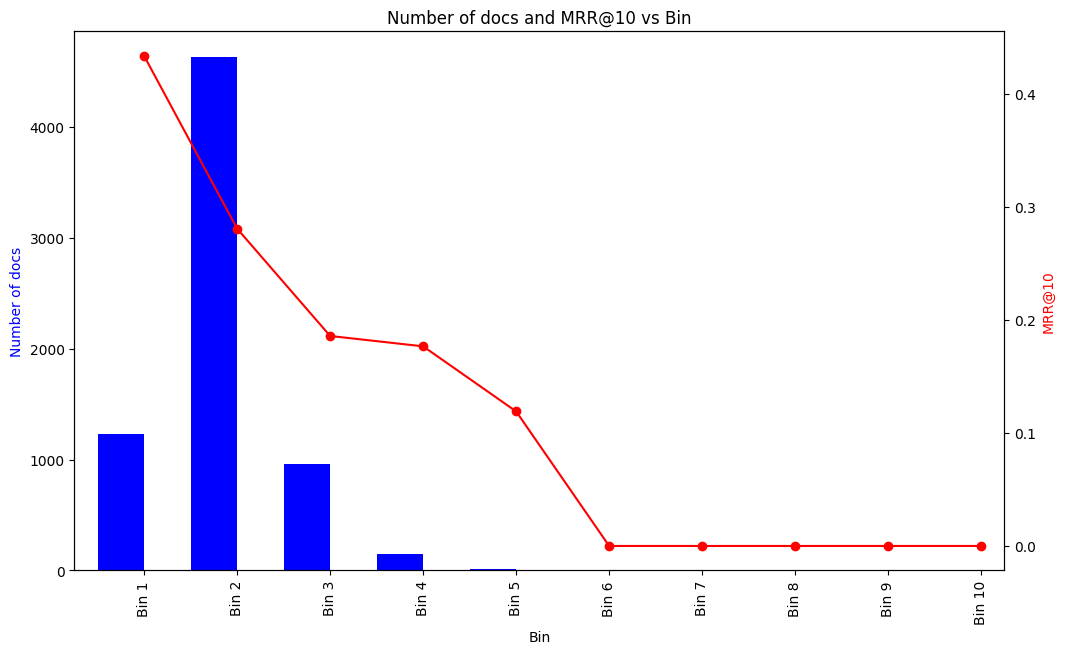

In [4]:
plot_mrr_results('../final_results/evaluation_passage_with_docs.txt')

### MSMARCO_PASSAGE_PREFIX

MRR@10: 0.3959414654113783


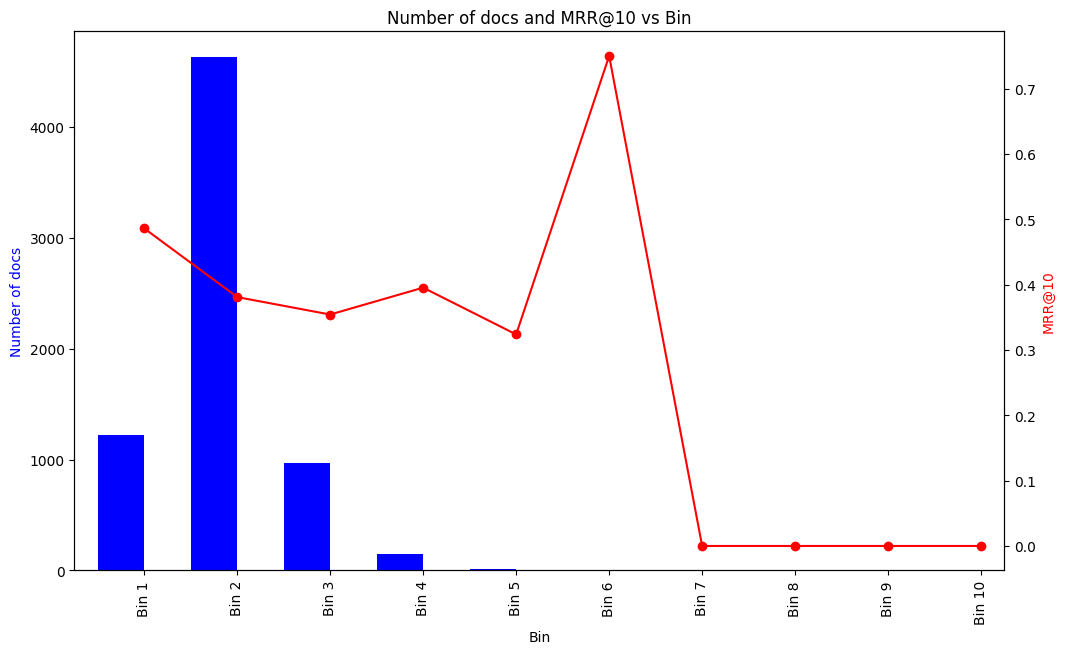

In [5]:
plot_mrr_results('../final_results/evaluation_passage_prefix.txt')

### MSMARCO_PASSAGE_POSTFIX

MRR@10: 0.39502865329512765


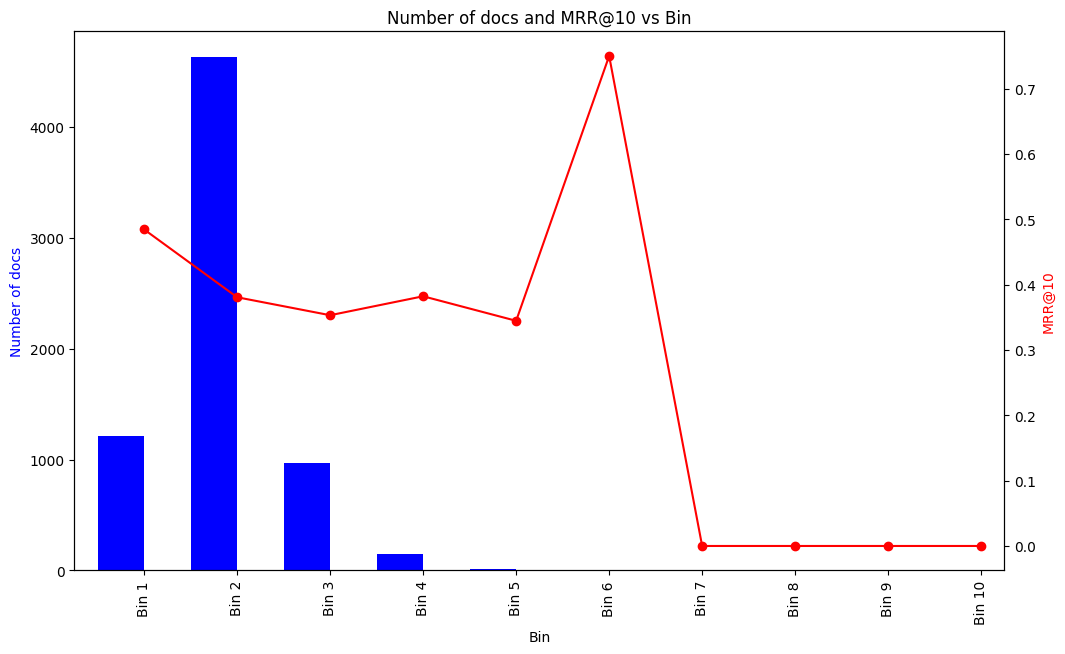

In [6]:
plot_mrr_results('../final_results/evaluation_passage_postfix.txt')

### MSMARCO_PASSAGE_RANDOM

MRR@10: 0.39621156819938924


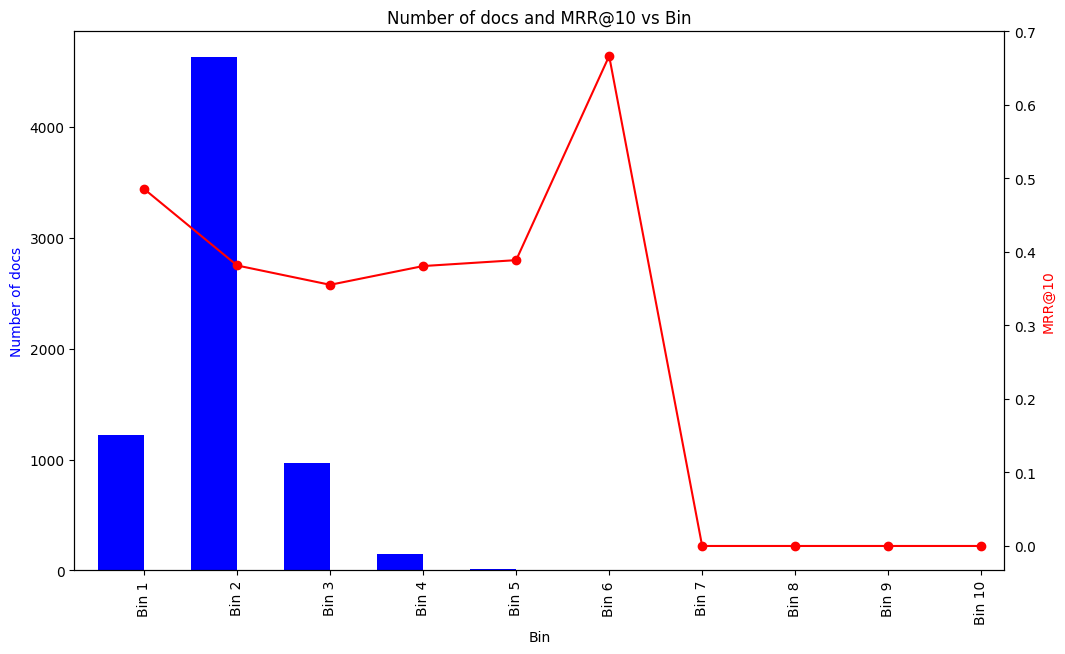

In [7]:
plot_mrr_results('../final_results/evaluation_passage_random.txt')

### MSMARCO_DOCS

MRR@10: 0.3823342778282122


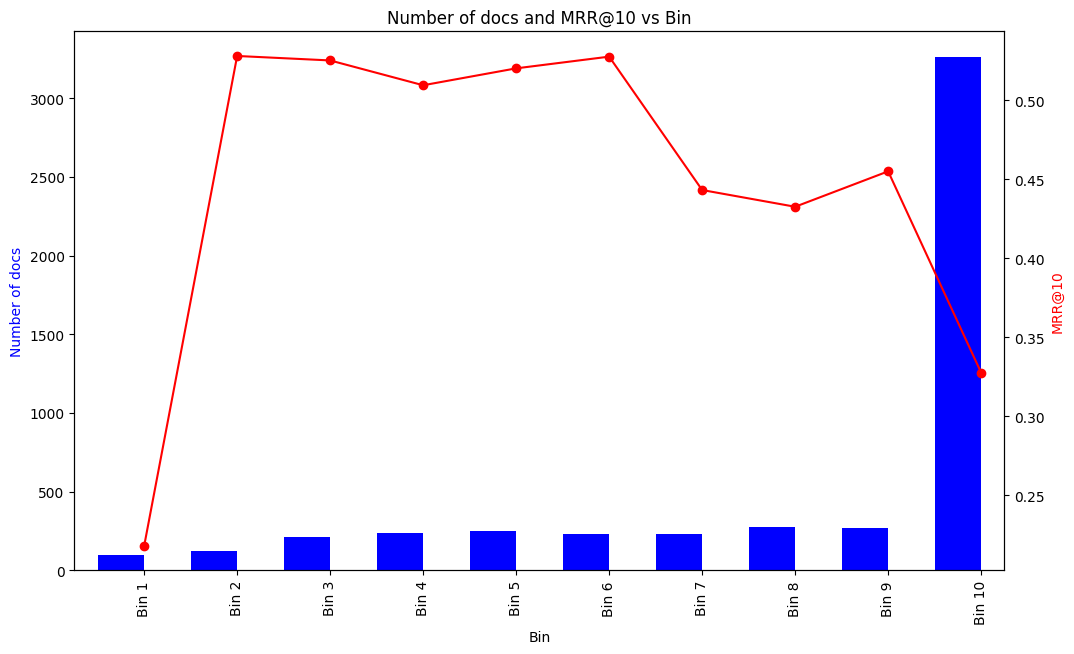

In [8]:
# This is for normal docs not finetuned, not splitted
plot_mrr_results('../final_results/evaluation_by_length_bins_docs.txt')

### MSMARCO_DOCS_WITH_SUM_USING_NOT_FINETUNED_VERSION

MRR@10: 0.3614375578846989


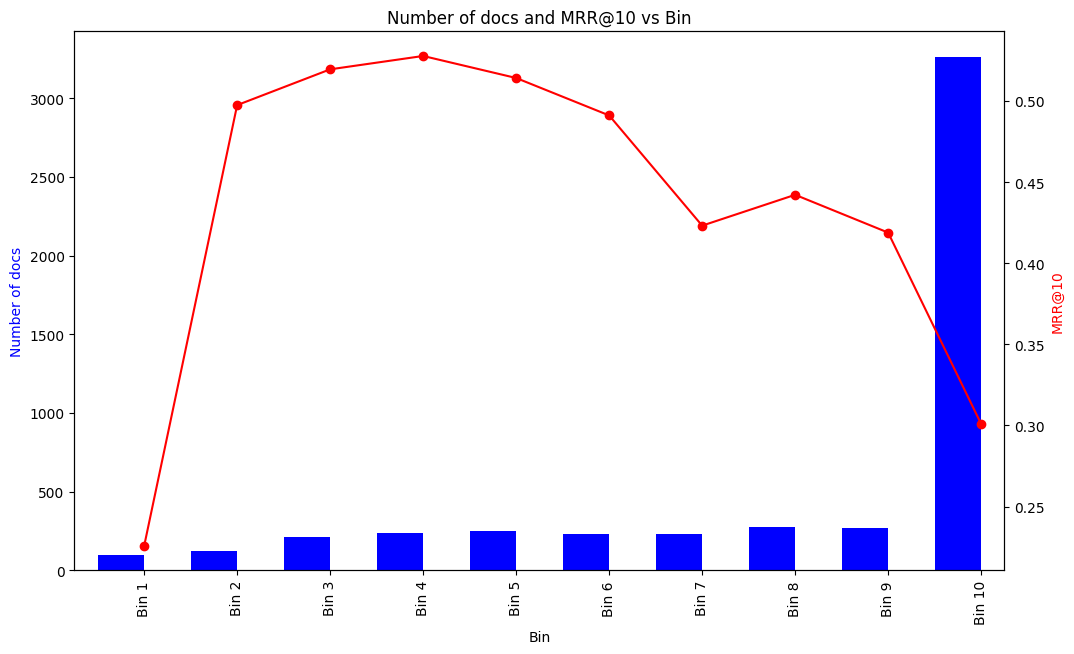

In [9]:
plot_mrr_results('../final_results/evaluation_passage_sum.txt')

### MSMARCO_DOCS_256_FINETUNED

MRR@10: 0.22078515339636076


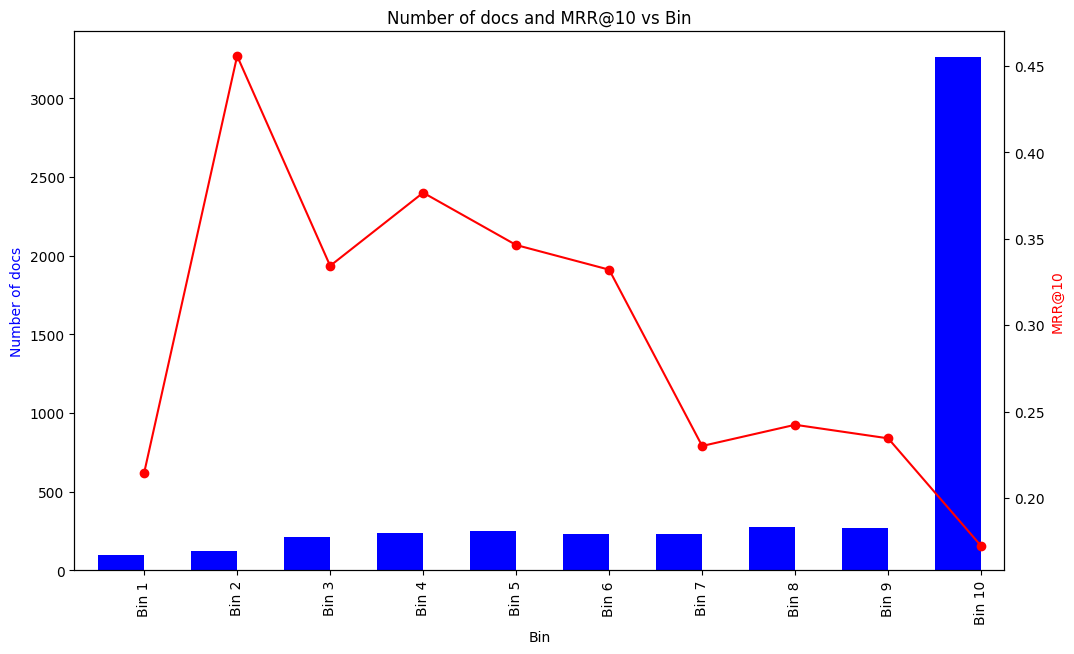

In [10]:
plot_mrr_results('../final_results/evaluation_by_length_bins_docs_256.txt')

### MSMARCO_DOCS_512_FINETUNED

MRR@10: 0.24173780944433765


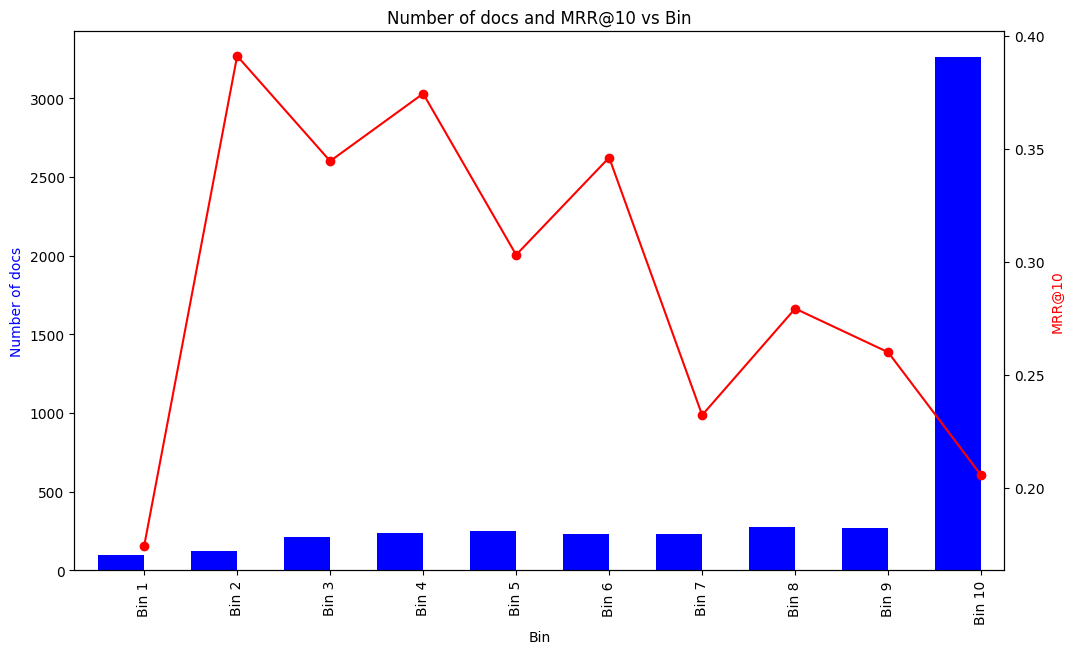

In [11]:
plot_mrr_results('../final_results/evaluation_by_length_bins_docs_512.txt')

### MSMARCO_DOCS_WITH_SUMMARIES

MRR@10: 0.21205232012568798


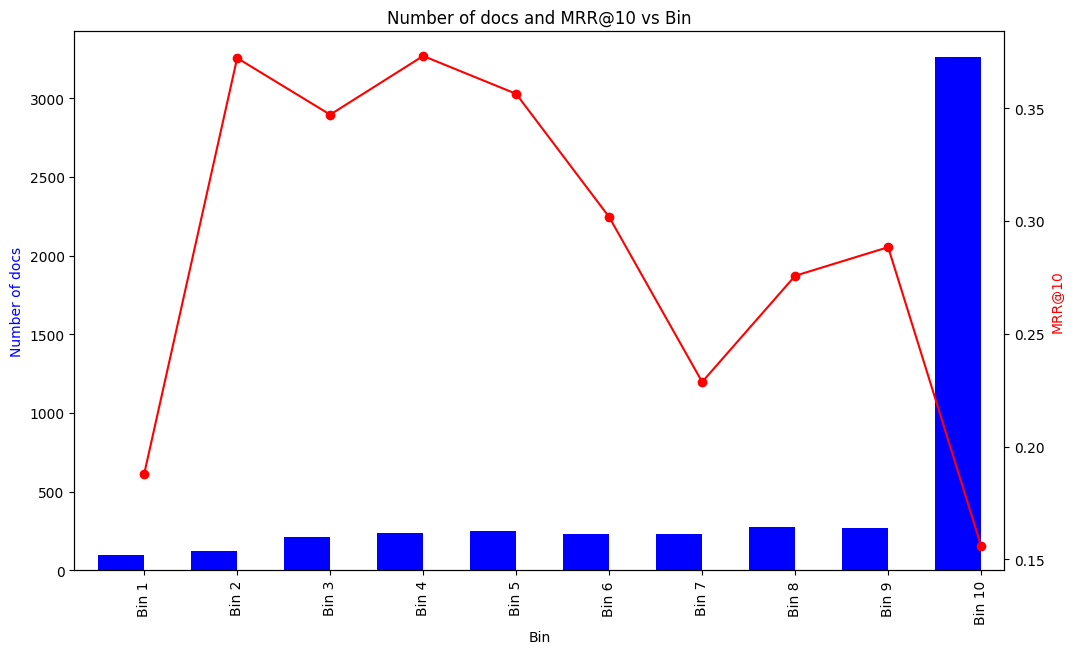

In [12]:
plot_mrr_results('../final_results/evaluation_passage_doc_sum.txt')

### MSMARCO_DOCS_SPLITTED

MRR@10: 0.2832186646977225


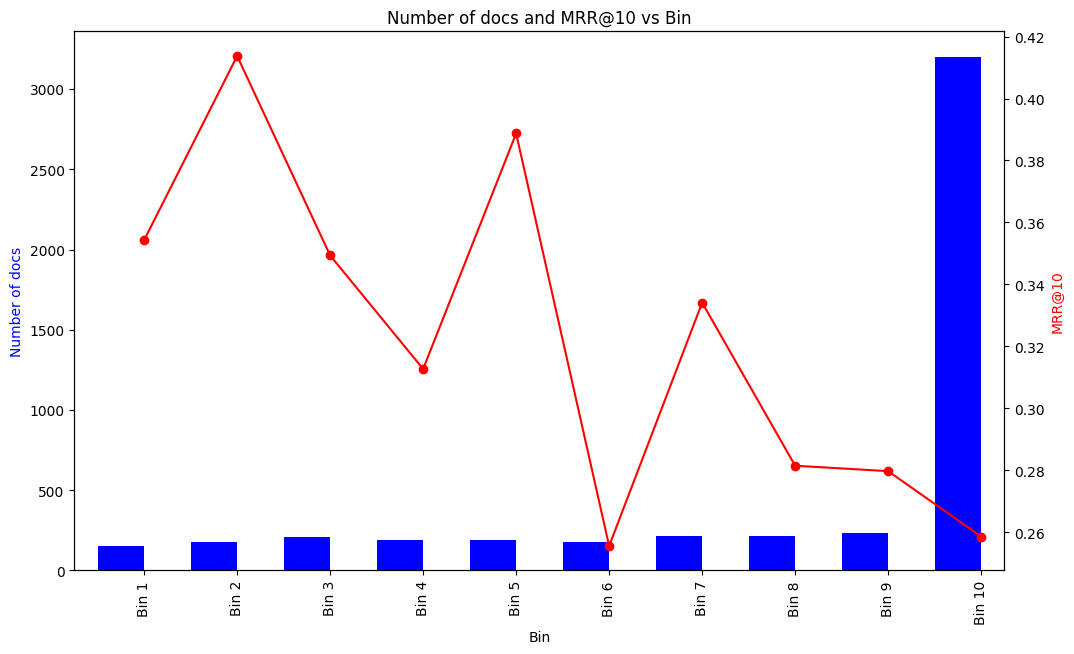

In [13]:
plot_mrr_results('../final_results/evaluation_docs_splitted.txt')